In [269]:
#Jupyter Notebook Python 3
#Import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.integrate as integrate

In [270]:
#Declare variables
begincases1=round((9000/60)*100) #27 oktober 2020
begincases2=9000

besmettelijk=5 # #4 dagen infectieus

r1=0.90
groeifactor1=r1**(1/besmettelijk) # want R=groeifactor^4

r2=0.8 #0.62
groeifactor2=r2**(1/besmettelijk) # want R=groeifactor^4

r3=0.7 #0.62
groeifactor3=r3**(1/besmettelijk) # want R=groeifactor^4

print(groeifactor1)
print(groeifactor2)

perc_longcovid=0.05
perc_ziekenhuis=0.015
perc_ic=0.0035
perc_overleden=0.005

0.9791483623609768
0.956352499790037


In [271]:
#Calculate limits NL and DE
#Number of habitants in NL august 2020: 17 440 679
#Limit NL waakzaam>zorgelijk: 7 per 100000 habitants per day (50 per 100000 per week) 
#Limet DE 5 per 100000 per day >> 35 per 100000 per week 
grenswaarde_nl_exact =5*(17440679/100000)
grenswaarde_nl=int(math.floor(grenswaarde_nl_exact / 10.0)) * 10 #afronden op laagste 10-tal
land_NL = 'NL:'
print(land_NL+str(grenswaarde_nl))
grenswaarde_de_exact =5*(17440679/100000)
grenswaarde_de=int(math.floor(grenswaarde_de_exact / 10.0)) * 10
land_DE='DE:'
print(land_DE+str(grenswaarde_de))

NL:870
DE:870


In [272]:
#Calculate days untill reaching limits DE
dagen1_de = np.log(grenswaarde_de/(begincases1))/np.log(groeifactor1)
print(round(dagen1_de))
dagen2_de = np.log(grenswaarde_de/(begincases1))/np.log(groeifactor2)
print(round(dagen2_de))
dagen3_de = np.log(grenswaarde_de/(begincases2))/np.log(groeifactor1)
print(round(dagen3_de))
dagen4_de = np.log(grenswaarde_de/(begincases2))/np.log(groeifactor2)
print(round(dagen4_de))

135.0
64.0
111.0
52.0


In [273]:
#Calculate days untill reaching limits NL
dagen1_nl = np.log(grenswaarde_nl/(begincases1))/np.log(groeifactor1)
print(round(dagen1_nl))
dagen2_nl = np.log(grenswaarde_nl/(begincases1))/np.log(groeifactor2)
print(round(dagen2_nl))
dagen3_nl = np.log(grenswaarde_nl/(begincases1))/np.log(groeifactor3)
print(round(dagen3_nl))
dagen4_nl = np.log(grenswaarde_nl/(begincases2))/np.log(groeifactor1)
print(round(dagen4_nl))
dagen5_nl = np.log(grenswaarde_nl/(begincases2))/np.log(groeifactor2)
print(round(dagen5_nl))
dagen6_nl = np.log(grenswaarde_nl/(begincases2))/np.log(groeifactor3)
print(round(dagen6_nl))

135.0
64.0
40.0
111.0
52.0
33.0


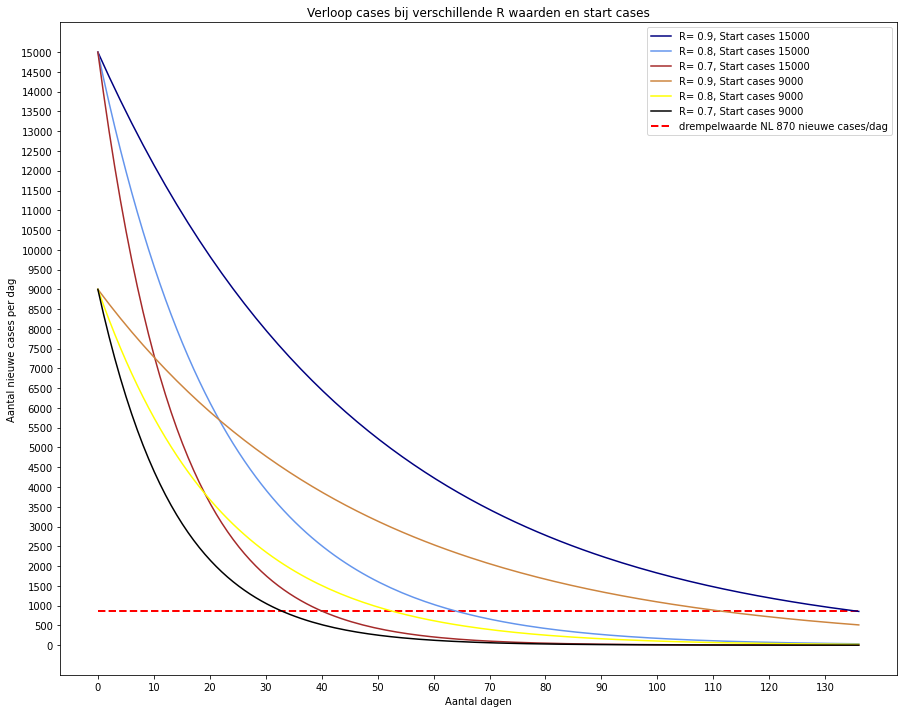

In [274]:
#Plot graphs begincases1 - begincases2, groeifactor1 - groeifactor2
x_as_max = int(math.ceil(np.max([dagen1_de, dagen2_de, dagen3_de,dagen4_de])))
days = np.linspace(0, x_as_max, x_as_max)

cases1 = begincases1 * (groeifactor1 ** days)
cases2 = begincases1 * (groeifactor2 ** days)
cases3 = begincases1 * (groeifactor3 ** days)
cases4 = begincases2 * (groeifactor1 ** days)
cases5 = begincases2 * (groeifactor2 ** days)
cases6 = begincases2 * (groeifactor3 ** days)

fig, ax = plt.subplots(figsize=(15, 12))
ax.plot(days,cases1, label="R= "+str(r1)+", Start cases "+ str(begincases1), color="navy")
ax.plot(days,cases2, label="R= "+str(r2)+", Start cases "+ str(begincases1), color="cornflowerblue")
ax.plot(days,cases3, label="R= "+str(r3)+", Start cases " + str(begincases1), color="brown")
ax.plot(days,cases4, label="R= "+str(r1)+", Start cases "+ str(begincases2), color="peru")
ax.plot(days,cases5, label="R= "+str(r2)+", Start cases "+ str(begincases2), color="yellow")
ax.plot(days,cases6, label="R= "+str(r3)+", Start cases "+ str(begincases2), color="black")
ax.hlines(y=grenswaarde_nl, xmin=0, xmax=x_as_max, linewidth=2, color='r', linestyles='dashed', label="drempelwaarde NL "+str(grenswaarde_nl)+" nieuwe cases/dag")

plt.legend()
plt.title("Verloop cases bij verschillende R waarden en start cases")
plt.xlabel("Aantal dagen")
plt.xticks(np.arange(0, x_as_max+1, step=10))
plt.ylabel("Aantal nieuwe cases per dag")
plt.yticks(np.arange(0, begincases1+100, step=500))
plt.savefig('Verloop cases bij verschillende R waarden en start cases.png')
plt.show()

In [275]:
def f_berekening_integraal(p_lower_bound, p_upper_bound, p_begincases, p_groeifactor, p_reproductie, p_grenswaarde, p_land):
    # define components for integral calculation
    f = lambda days: p_begincases * (p_groeifactor ** days)
    # calculate integral
    totaal, error = integrate.quad(f, p_lower_bound, p_upper_bound)

    print("R="+str(p_reproductie) + ", Start cases/dag= "+str(p_begincases))
    print("Grenswaarde "+p_land+str(p_grenswaarde)+" cases/dag bereikt op dag: "+str(p_upper_bound))
    print("Totaal geschatte cases: "+str(round(totaal)))
    print("Totaal geschatte longcovid patienten (10%): "+str(round(totaal*perc_longcovid)))
    print("Totaal geschatte ziekenhuisopnames (1,5%): "+ str(round(totaal*perc_ziekenhuis)))
    print("Totaal geschatte IC opnames (0,35%): "+ str(round(totaal*perc_ic)))
    print("Totaal geschatte overledenen (0,05%): "+ str(round(totaal*perc_overleden)))
    print("=====================================================")

    
lower_bound = 0

upper_bound = int(round(dagen1_nl))
f_berekening_integraal(lower_bound, upper_bound, begincases1, groeifactor1, r1, grenswaarde_nl, land_NL)

upper_bound = int(round(dagen2_nl))
f_berekening_integraal(lower_bound, upper_bound, begincases1, groeifactor2, r2, grenswaarde_nl, land_NL)

upper_bound = int(round(dagen3_nl))
f_berekening_integraal(lower_bound, upper_bound, begincases1, groeifactor3, r3, grenswaarde_nl, land_NL)

upper_bound = int(round(dagen4_nl))
f_berekening_integraal(lower_bound, upper_bound, begincases2, groeifactor1, r1, grenswaarde_nl, land_NL)

upper_bound = int(round(dagen5_nl))
f_berekening_integraal(lower_bound, upper_bound, begincases2, groeifactor2, r2, grenswaarde_nl, land_NL)

upper_bound = int(round(dagen6_nl))
f_berekening_integraal(lower_bound, upper_bound, begincases2, groeifactor3, r3, grenswaarde_nl, land_NL)

upper_bound = int(round(dagen1_de))
f_berekening_integraal(lower_bound, upper_bound, begincases1, groeifactor1, r1, grenswaarde_de, land_DE)

upper_bound = int(round(dagen2_de))
f_berekening_integraal(lower_bound, upper_bound, begincases1, groeifactor2, r2, grenswaarde_de, land_DE)

upper_bound = int(round(dagen3_de))
f_berekening_integraal(lower_bound, upper_bound, begincases2, groeifactor1, r1, grenswaarde_de, land_DE)

upper_bound = int(round(dagen4_de))
f_berekening_integraal(lower_bound, upper_bound, begincases2, groeifactor2, r2, grenswaarde_de, land_DE)

R=0.9, Start cases/dag= 15000
Grenswaarde NL:870 cases/dag bereikt op dag: 135
Totaal geschatte cases: 670448
Totaal geschatte longcovid patienten (10%): 33522
Totaal geschatte ziekenhuisopnames (1,5%): 10057
Totaal geschatte IC opnames (0,35%): 2347
Totaal geschatte overledenen (0,05%): 3352
R=0.8, Start cases/dag= 15000
Grenswaarde NL:870 cases/dag bereikt op dag: 64
Totaal geschatte cases: 316786
Totaal geschatte longcovid patienten (10%): 15839
Totaal geschatte ziekenhuisopnames (1,5%): 4752
Totaal geschatte IC opnames (0,35%): 1109
Totaal geschatte overledenen (0,05%): 1584
R=0.7, Start cases/dag= 15000
Grenswaarde NL:870 cases/dag bereikt op dag: 40
Totaal geschatte cases: 198154
Totaal geschatte longcovid patienten (10%): 9908
Totaal geschatte ziekenhuisopnames (1,5%): 2972
Totaal geschatte IC opnames (0,35%): 694
Totaal geschatte overledenen (0,05%): 991
R=0.9, Start cases/dag= 9000
Grenswaarde NL:870 cases/dag bereikt op dag: 111
Totaal geschatte cases: 385922
Totaal geschatte

In [276]:
def f_berekening_loop(p_upper_bound, p_begincases, p_groeifactor, p_reproductie, p_grenswaarde, p_land):
    totaal=0

    for days in range(0,int(round(p_upper_bound))+1):
        cases = p_begincases * (p_groeifactor ** days)
        totaal=totaal+cases
        print("Dag: "+str(days)+", Cases: "+str(round(cases))+", Ziekenhuisopnames: "+str(round(cases*0.015))+", Overledenen "+str(round(cases*0.002)))

    print("")
    print("R="+str(p_reproductie) + ", Start cases/dag= "+str(p_begincases) )
    print("Grenswaarde "+p_land+str(p_grenswaarde)+" cases/dag bereikt op dag: "+str(int(round(p_upper_bound))))
    print("Geschatte cases op dag "+str(days)+": "+str(round(cases)))
    print("Totaal geschatte cases: "+str(round(totaal)))
    print("Totaal geschatte ziekenhuisopnames (1,5%): "+ str(round(totaal*0.015)))
    print("Totaal geschatte IC opnames (0,35%): "+ str(round(totaal*0.0035)))
    print("Totaal geschatte overledenen (0,4%): "+ str(round(totaal*0.004)))
    print("*************************************************************")
    
f_berekening_loop(dagen1_nl, begincases1, groeifactor1, r1, grenswaarde_nl, land_NL)
f_berekening_loop(dagen2_nl, begincases1, groeifactor2, r2, grenswaarde_nl, land_NL)
f_berekening_loop(dagen3_nl, begincases2, groeifactor1, r1, grenswaarde_nl, land_NL)
f_berekening_loop(dagen4_nl, begincases2, groeifactor2, r2, grenswaarde_nl, land_NL)
f_berekening_loop(dagen1_de, begincases1, groeifactor1, r1, grenswaarde_de, land_DE)
f_berekening_loop(dagen2_de, begincases1, groeifactor2, r2, grenswaarde_de, land_DE)
f_berekening_loop(dagen3_de, begincases2, groeifactor1, r1, grenswaarde_de, land_DE)
f_berekening_loop(dagen4_de, begincases2, groeifactor2, r2, grenswaarde_de, land_DE)

Dag: 0, Cases: 15000, Ziekenhuisopnames: 225, Overledenen 30
Dag: 1, Cases: 14687, Ziekenhuisopnames: 220, Overledenen 29
Dag: 2, Cases: 14381, Ziekenhuisopnames: 216, Overledenen 29
Dag: 3, Cases: 14081, Ziekenhuisopnames: 211, Overledenen 28
Dag: 4, Cases: 13787, Ziekenhuisopnames: 207, Overledenen 28
Dag: 5, Cases: 13500, Ziekenhuisopnames: 202, Overledenen 27
Dag: 6, Cases: 13219, Ziekenhuisopnames: 198, Overledenen 26
Dag: 7, Cases: 12943, Ziekenhuisopnames: 194, Overledenen 26
Dag: 8, Cases: 12673, Ziekenhuisopnames: 190, Overledenen 25
Dag: 9, Cases: 12409, Ziekenhuisopnames: 186, Overledenen 25
Dag: 10, Cases: 12150, Ziekenhuisopnames: 182, Overledenen 24
Dag: 11, Cases: 11897, Ziekenhuisopnames: 178, Overledenen 24
Dag: 12, Cases: 11649, Ziekenhuisopnames: 175, Overledenen 23
Dag: 13, Cases: 11406, Ziekenhuisopnames: 171, Overledenen 23
Dag: 14, Cases: 11168, Ziekenhuisopnames: 168, Overledenen 22
Dag: 15, Cases: 10935, Ziekenhuisopnames: 164, Overledenen 22
Dag: 16, Cases: 10

verdubbeltijd =np.log(2)/np.log(groeifactor1)
print(verdubbeltijd)